# Etapa 5: Digitalização (Amostragem e Quantização)

**Objetivo:** Converter o sinal contínuo escolhido (Onda Quadrada) em um sinal digital discreto.

**Tarefas:**
* Amostrar o sinal contínuo escolhido com uma frequência de amostragem adequada, seguindo o Teorema de Nyquist (pelo menos o dobro da maior frequência presente no sinal, ou seja, considerando as harmônicas significativas). Escolha uma frequência de amostragem que demonstre claramente o processo.
* Escolher um número de bits para a quantização (ex: 8, 12, 16 bits) e aplicar a quantização ao sinal amostrado.
* Mostrar o gráfico do sinal discretizado (representação discreta no tempo e na amplitude).
* Comentar sobre perdas ou efeitos visuais da amostragem e quantização (como aliasing, ruído de quantização, etc.).

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Sinal Analógico Original (Onda Quadrada)

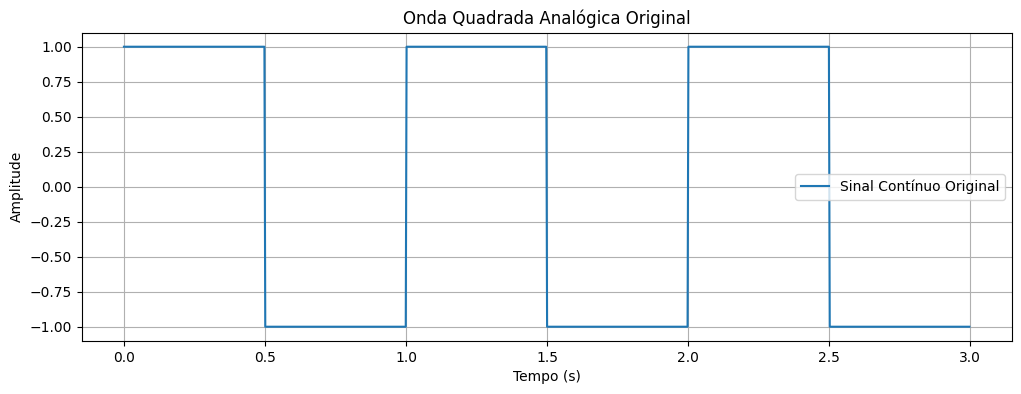

In [12]:
# Parâmetros do sinal (consistente com Etapas Anteriores)
f_fundamental = 1  # Hz
T = 1 / f_fundamental # Período
amplitude = 1
n_ciclos_plot = 3 # Número de ciclos para plotagem

# Vetor de tempo para o sinal contínuo (alta resolução para simular o analógico)
t_continuo = np.linspace(0, n_ciclos_plot * T, 1000, endpoint=False)
onda_quadrada_continua = amplitude * signal.square(2 * np.pi * f_fundamental * t_continuo)

plt.figure(figsize=(12, 4))
plt.plot(t_continuo, onda_quadrada_continua, label='Sinal Contínuo Original')
plt.title('Onda Quadrada Analógica Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

## 1. Amostragem

Para evitar aliasing, a frequência de amostragem ($f_s$) deve ser pelo menos o dobro da maior frequência significativa no sinal ($f_{max}$). A onda quadrada teoricamente tem harmônicas infinitas. Na prática, consideramos uma largura de banda efetiva. Por exemplo, se considerarmos harmônicas até a 9ª ($9 \times f_0 = 9 \text{ Hz}$), $f_{max} = 9 \text{ Hz}$. Então, $f_s > 2 \times 9 = 18 \text{ Hz}$.

Vamos escolher algumas frequências de amostragem para observar o efeito:
1.  $f_s = 5 \text{ Hz}$ (Abaixo de Nyquist para a 3ª harmônica, para ilustrar aliasing se ela fosse a $f_{max}$)
2.  $f_s = 20 \text{ Hz}$ (Satisfaz Nyquist para harmônicas até aprox. 9 Hz)

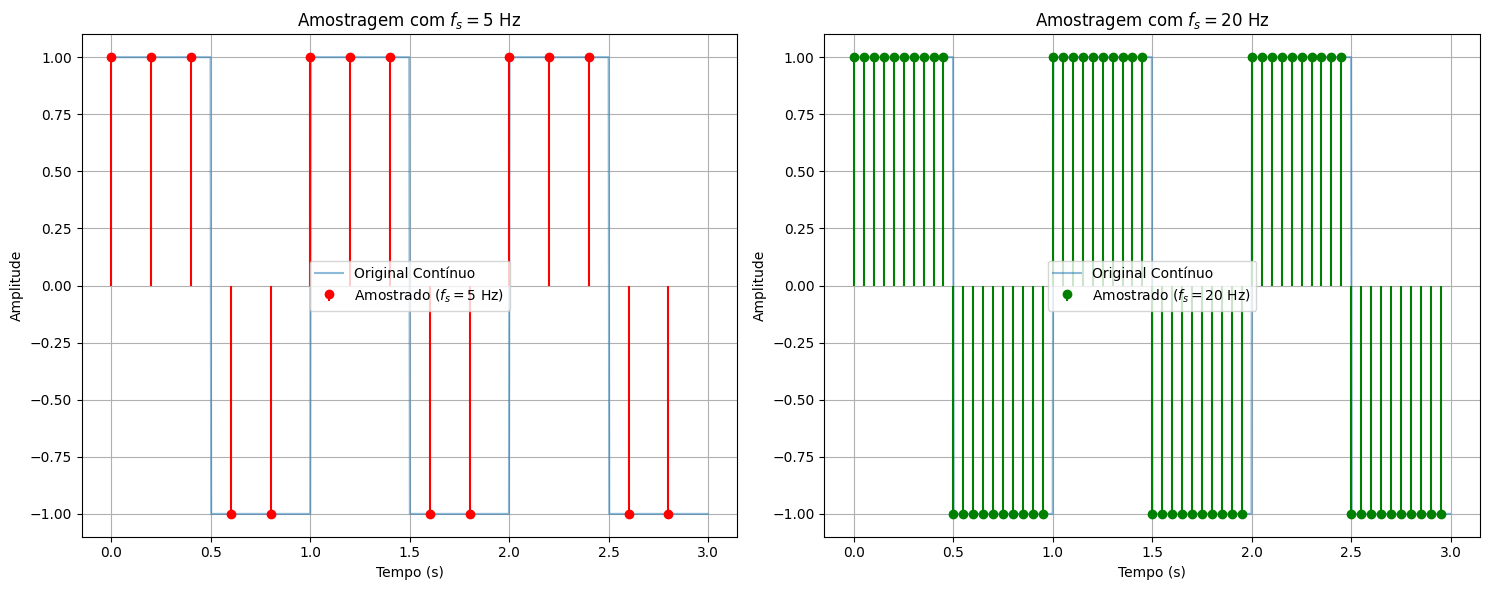

In [13]:
# Frequências de amostragem
fs1 = 5  # Hz - Abaixo do ideal para muitas harmônicas
fs2 = 20 # Hz - Adequada para as primeiras harmônicas

# Tempo de amostragem
t_amostrado1 = np.arange(0, n_ciclos_plot * T, 1/fs1)
sinal_amostrado1 = amplitude * signal.square(2 * np.pi * f_fundamental * t_amostrado1)

t_amostrado2 = np.arange(0, n_ciclos_plot * T, 1/fs2)
sinal_amostrado2 = amplitude * signal.square(2 * np.pi * f_fundamental * t_amostrado2)

# Plotando os sinais amostrados
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(t_continuo, onda_quadrada_continua, label='Original Contínuo', alpha=0.5)
plt.stem(t_amostrado1, sinal_amostrado1, linefmt='r-', markerfmt='ro', basefmt=' ', label=f'Amostrado ($f_s={fs1}$ Hz)')
plt.title(f'Amostragem com $f_s = {fs1}$ Hz')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_continuo, onda_quadrada_continua, label='Original Contínuo', alpha=0.5)
plt.stem(t_amostrado2, sinal_amostrado2, linefmt='g-', markerfmt='go', basefmt=' ', label=f'Amostrado ($f_s={fs2}$ Hz)')
plt.title(f'Amostragem com $f_s = {fs2}$ Hz')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Para as próximas etapas, vamos prosseguir com o sinal amostrado em $f_s = 20 \text{ Hz}$, pois ele captura melhor a forma da onda quadrada do que $f_s = 5 \text{ Hz}$ dentro do intervalo de interesse.

In [14]:
# Sinal escolhido para quantização
sinal_para_quantizar = sinal_amostrado2
t_sinal_para_quantizar = t_amostrado2
fs_escolhida = fs2

## 2. Quantização

A quantização aproxima cada amostra do sinal a um de um conjunto finito de níveis de amplitude. O número de níveis é determinado pelo número de bits ($N_{bits}$) do quantizador: $L = 2^{N_{bits}}$.

Vamos usar um número de bits comum, por exemplo, 4 bits, para visualizar o efeito de forma clara. Com 4 bits, temos $2^4 = 16$ níveis de quantização.
O sinal original varia de -1 a +1. Precisamos mapear essa faixa para os níveis de quantização.

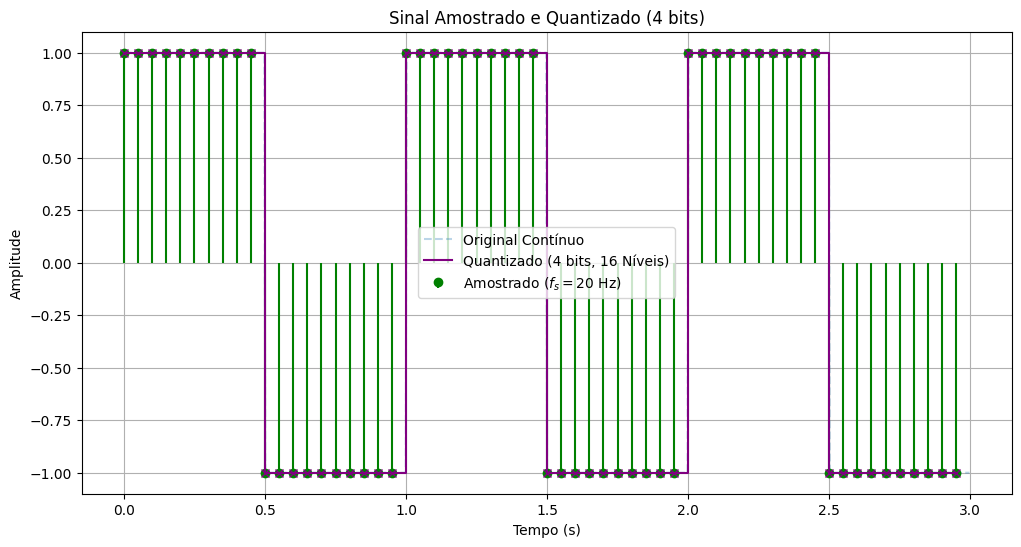

In [15]:
# Parâmetros de quantização
N_bits = 4
L = 2**N_bits  # Número de níveis de quantização

# Quantizar o sinal amostrado (sinal_para_quantizar)
# Normalizar o sinal para a faixa [0, L-1] e depois quantizar
# O sinal varia de -amplitude a +amplitude. Faixa total de 2*amplitude.
sinal_normalizado = (sinal_para_quantizar + amplitude) / (2 * amplitude) # Normaliza para [0, 1]
niveis_quantizados_indices = np.round(sinal_normalizado * (L - 1)) # Mapeia para índices [0, L-1]
sinal_quantizado_normalizado = niveis_quantizados_indices / (L - 1) # Normaliza de volta para [0, 1]
sinal_quantizado = (sinal_quantizado_normalizado * (2 * amplitude)) - amplitude # Mapeia de volta para [-amplitude, +amplitude]

plt.figure(figsize=(12, 6))
plt.plot(t_continuo, onda_quadrada_continua, label='Original Contínuo', alpha=0.3, linestyle='--')
plt.stem(t_sinal_para_quantizar, sinal_para_quantizar, linefmt='g-', markerfmt='go', basefmt=' ', label=f'Amostrado ($f_s={fs_escolhida}$ Hz)')
plt.step(t_sinal_para_quantizar, sinal_quantizado, where='post', color='purple', label=f'Quantizado ({N_bits} bits, {L} Níveis)')
plt.plot(t_sinal_para_quantizar, sinal_quantizado, marker='x', color='purple', linestyle='None')

plt.title(f'Sinal Amostrado e Quantizado ({N_bits} bits)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()